# Batch Gradient Descent with Custom Data

In [13]:
import numpy as np
import random, copy, math
import matplotlib.pyplot as plt

# Generate training data

In [14]:
tmp = np.arange(0,100)
tmp = tmp.reshape(-1, 1)
X_train = np.hstack([tmp, tmp**2])
y_train = (-100*tmp**4 + tmp**5 + random.randint(-10, 10))
# y_train = np.transpose((y_train))
m, n = X_train.shape

y_train = y_train.reshape(-1)


# Analyze data

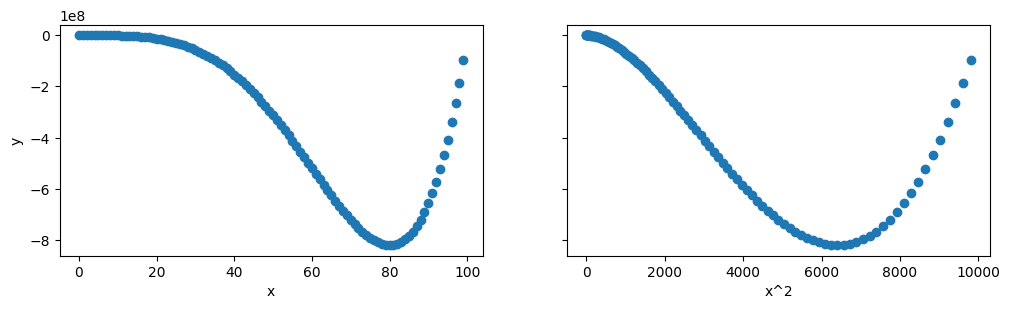

In [15]:
X_features = ['x', 'x^2']
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

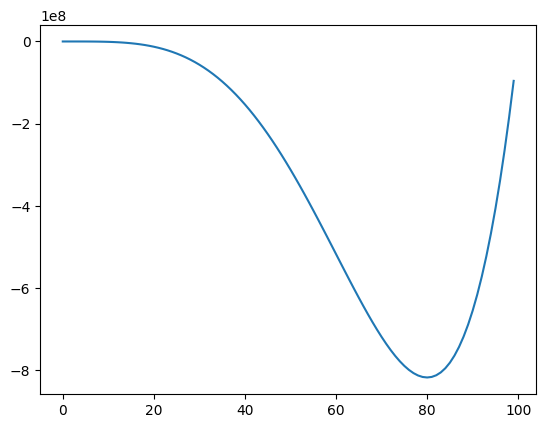

In [16]:
plt.plot(y_train)
plt.show()

# Feature engineering

In [17]:
X_train = np.c_[
    X_train,
    (X_train[:,0] ** 3),
    (X_train[:,0] ** 4), 
    (X_train[:,0] ** 5),
    (X_train[:,0] ** 6),
    (X_train[:,0] ** 7),
    (X_train[:,0] ** 8),
    (X_train[:,0] ** 9),
    (X_train[:,1] ** 3),
    (X_train[:,1] ** 4), 
    (X_train[:,1] ** 5), 
    (X_train[:,1] ** 6), 
    (X_train[:,1] ** 7), 
    (X_train[:,1] ** 8), 
    (X_train[:,1] ** 9),
]

# Perform feature scaling

In [18]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_norm = (X_train - mu) / sigma

y_mu = np.mean(y_train, axis=0)
y_sigma = np.std(y_train, axis=0)
y_norm = (y_train - y_mu) / y_sigma

In [19]:
def model(w, x, b):
    return np.dot(w, x) + b

_,n = X_norm.shape
model(np.ones(n,), X_norm[0], 0)

-8.770867397392033

In [20]:
def cost(w, X, b, y):
    m, _ = X.shape
    sum = 0

    for i in range(m):
        x = X[i]
        sum += ((model(w, x, b) - y[i]) ** 2) / (2 * m)
    return sum 

_,n = X_norm.shape
cost(np.ones(n,), X_norm, 0, y_norm)

65.8247326581186

In [21]:
def gradient(w, X, b, y):
    m, n = X.shape

    dj_dw = np.zeros(n,)
    dj_db = 0

    for i in range(m):
        x = X[i]
        err = model(w, x, b) - y[i]
        for j in range(n):
            dj_dw += err * x[j]
        dj_db += err

    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

_,n = X_norm.shape
gradient(np.ones(n,), X_norm, 0, y_norm)

(array([125.0364514, 125.0364514, 125.0364514, 125.0364514, 125.0364514,
        125.0364514, 125.0364514, 125.0364514, 125.0364514, 125.0364514,
        125.0364514, 125.0364514, 125.0364514, 125.0364514, 125.0364514,
        125.0364514]),
 3.1974423109204507e-16)

In [22]:
def gradient_descent(w, X, b, y, alpha, iterations):

    w = copy.deepcopy(w)
    b = copy.copy(b)
    J_history = []

    for i in range(iterations):
        dj_dw, dj_db = gradient(w, X, b, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:      # prevent resource exhaustion
            J_history.append(cost(w, X, b, y)) # Print cost every at intervals 10 times or as many iterations if < 10

        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

_,n = X_norm.shape
w_calc, b_calc, j_hist = gradient_descent(np.ones(n,), X_norm, 0, y_norm, 0.003, 1000)

print(w_calc, b_calc)

Iteration    0: Cost    27.32
Iteration  100: Cost     0.37
Iteration  200: Cost     0.37
Iteration  300: Cost     0.37
Iteration  400: Cost     0.37
Iteration  500: Cost     0.37
Iteration  600: Cost     0.37
Iteration  700: Cost     0.37
Iteration  800: Cost     0.37
Iteration  900: Cost     0.37
[-0.04700094 -0.04700094 -0.04700094 -0.04700094 -0.04700094 -0.04700094
 -0.04700094 -0.04700094 -0.04700094 -0.04700094 -0.04700094 -0.04700094
 -0.04700094 -0.04700094 -0.04700094 -0.04700094] -9.124367927882437e-18


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


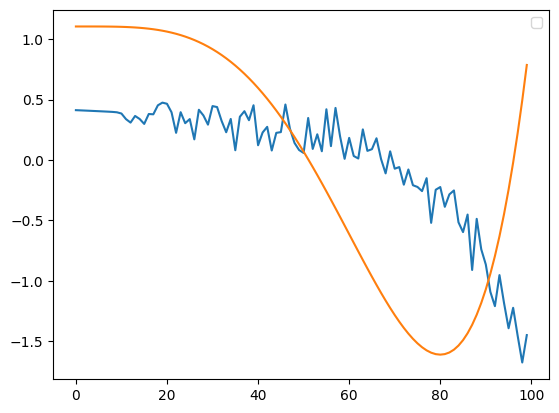

In [23]:
y_calc = np.dot(X_norm, w_calc)
plt.plot(y_calc)
plt.plot(y_norm)
plt.legend()
plt.show()